In [1]:
from IPython.display import display, HTML

# Set the width of the notebook container
display(HTML("""
<style>
    div.container { width:80% !important; }
    div.notebook-container { width:95% !important; }
    div.CodeMirror { max-width:100%; }
</style>
"""))

Creating data center grid...
Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells

Placing pillars...
Pillar dimensions: 609.6mm × 609.6mm
Spacing: 18.0ft × 18.0ft
In grid cells - Pillar: 1×1, Spacing: 9×9
Room can fit 9 pillars in x-direction
Room can fit 5 pillars in y-direction
Placed 45 pillars in total

Placing MMR room...
Failed to create support room 'MMR' at (65, 31)


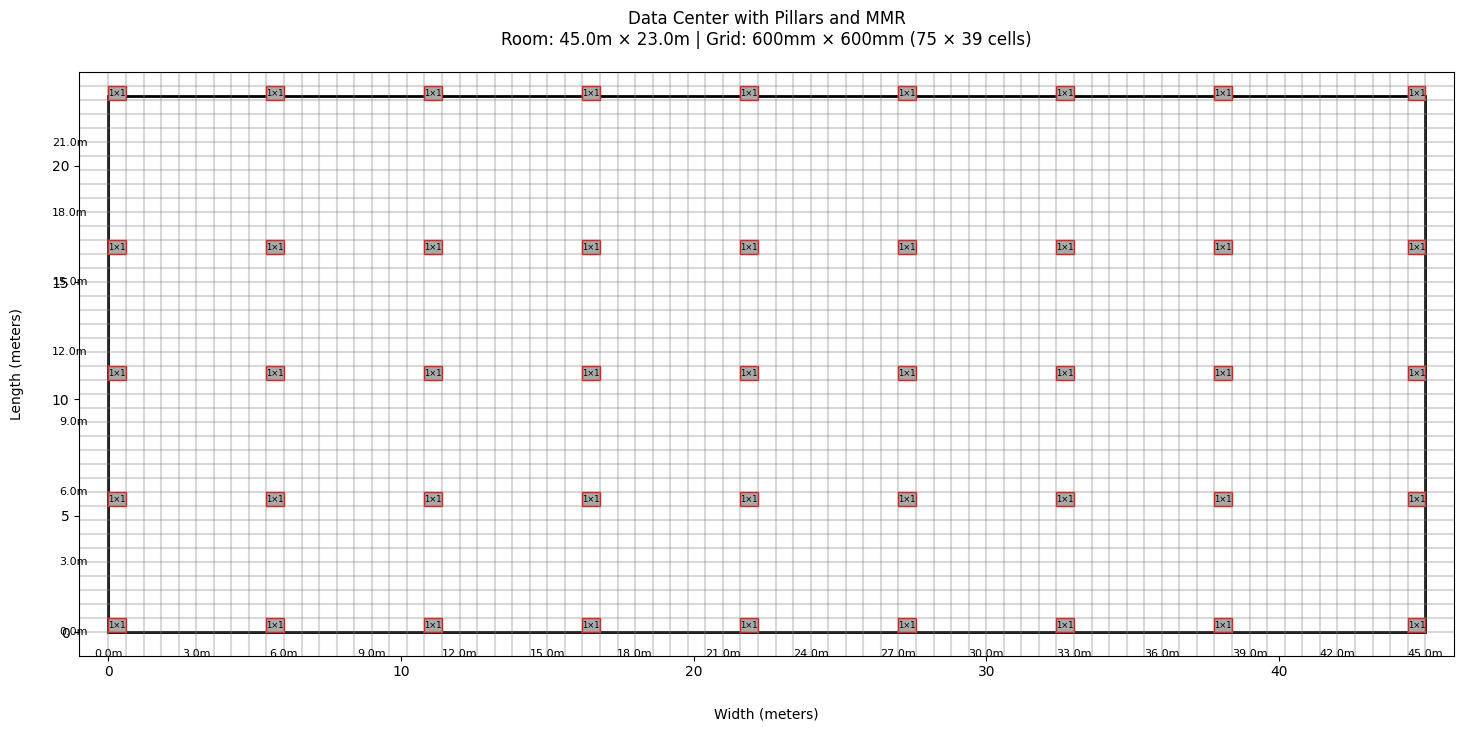


===== Comparing Layout Strategies =====
Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells

Generating Standard Row Layout...
Successfully placed 78 racks


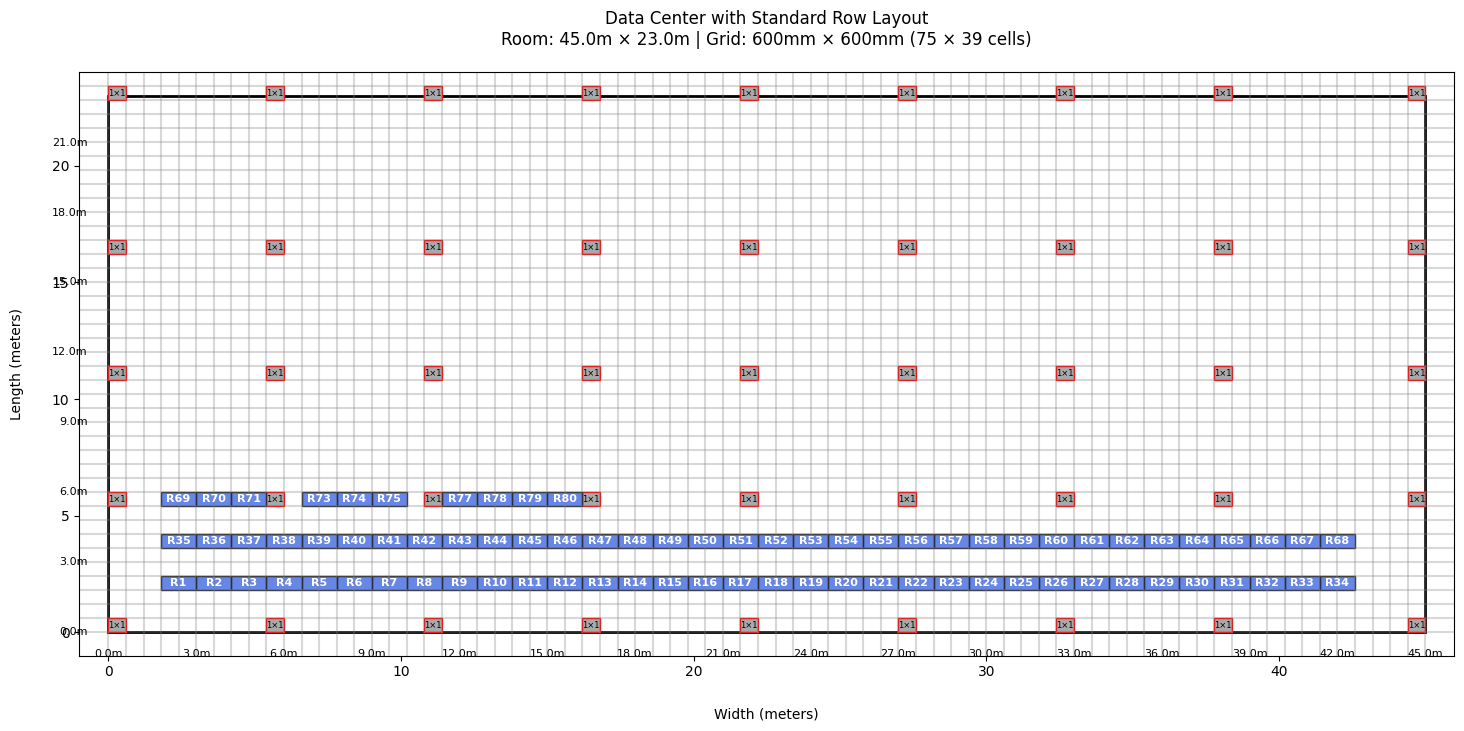

Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells

Generating Hot/Cold Aisle Layout...
Successfully placed 77 racks


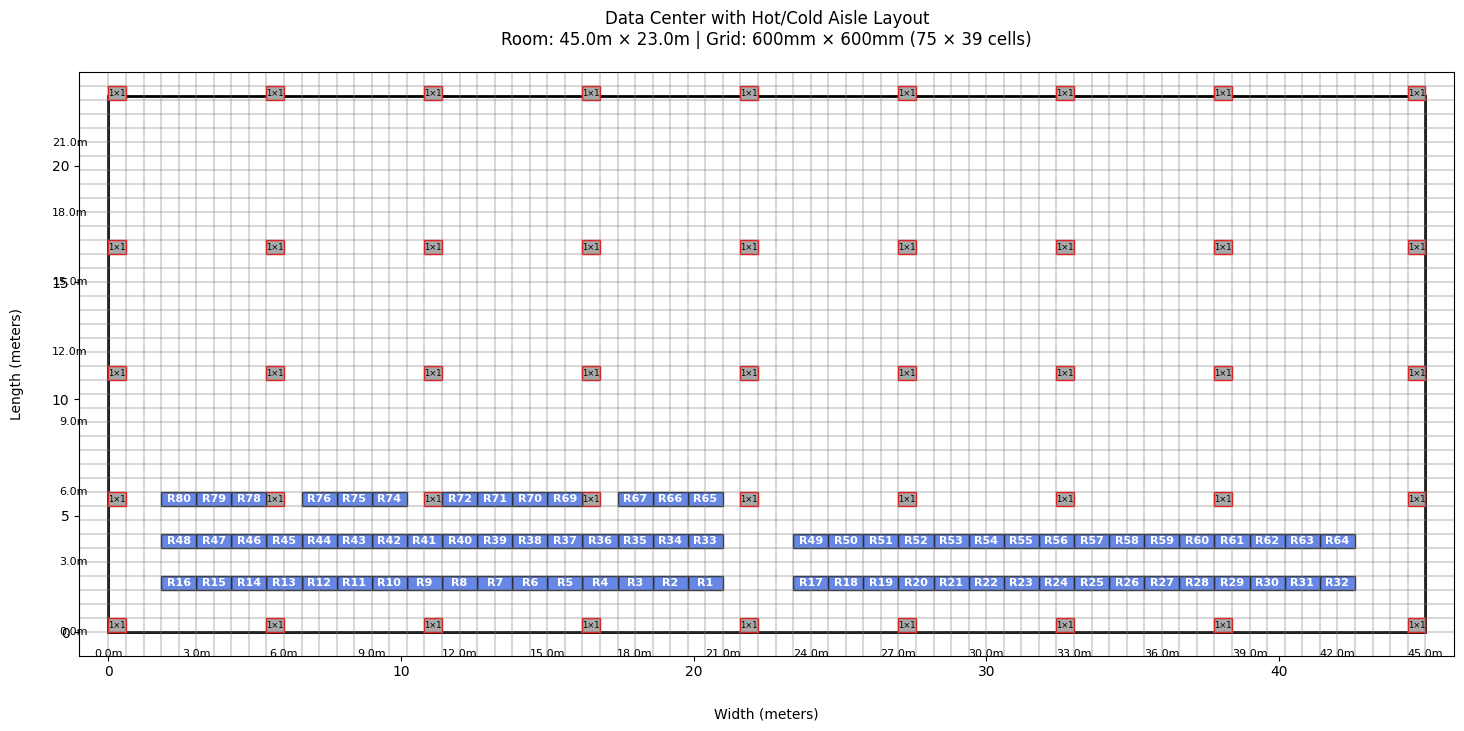

Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells

Generating Perimeter Layout...
Successfully placed 80 racks


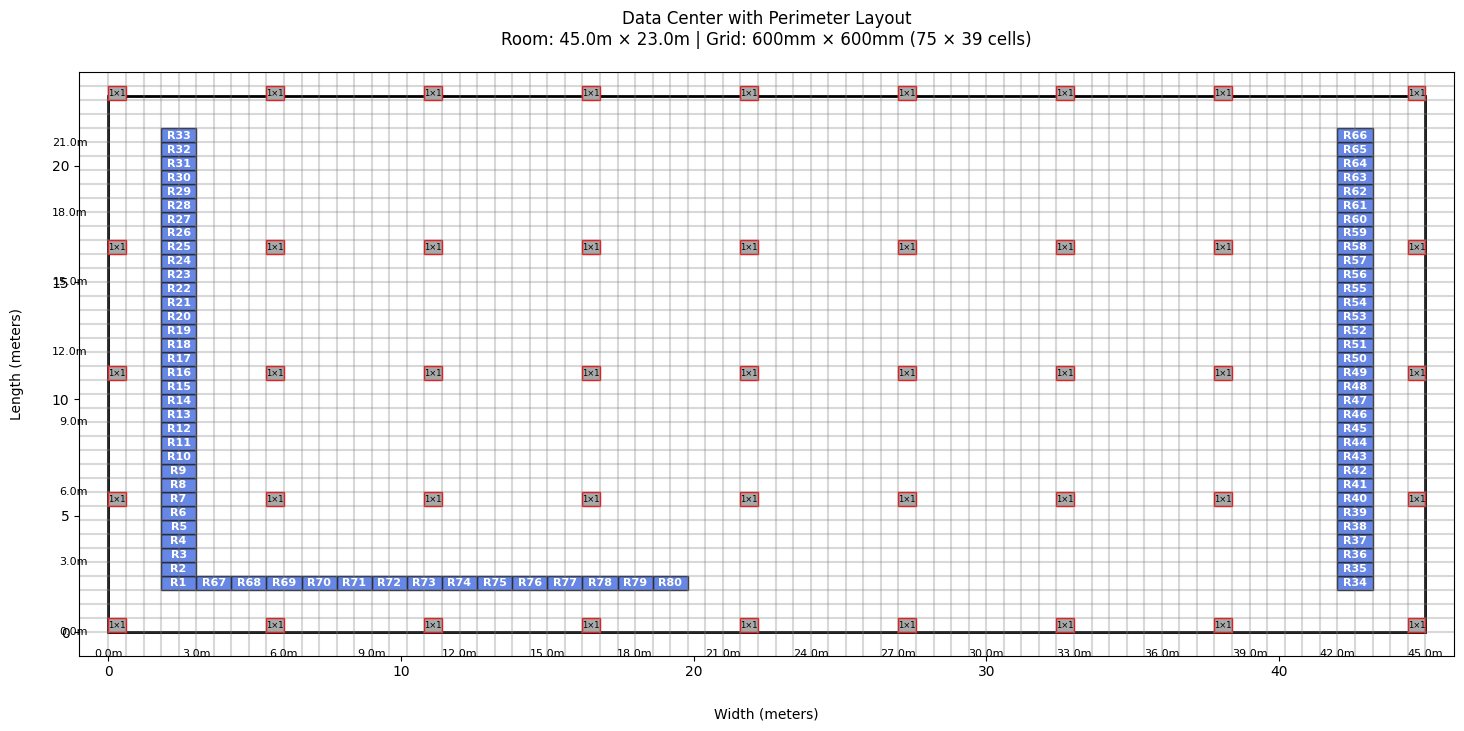

Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells

Generating Pod-based Layout...
Successfully placed 74 racks


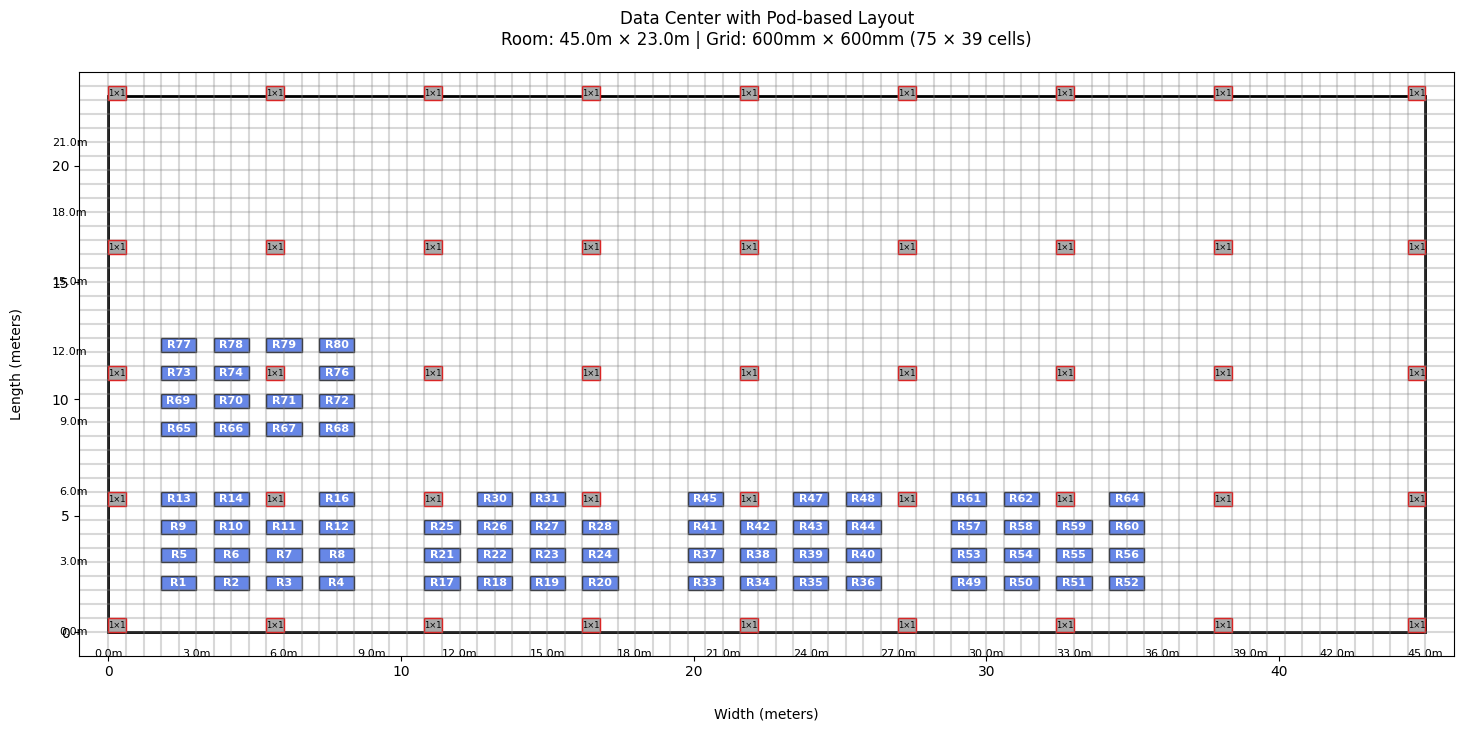

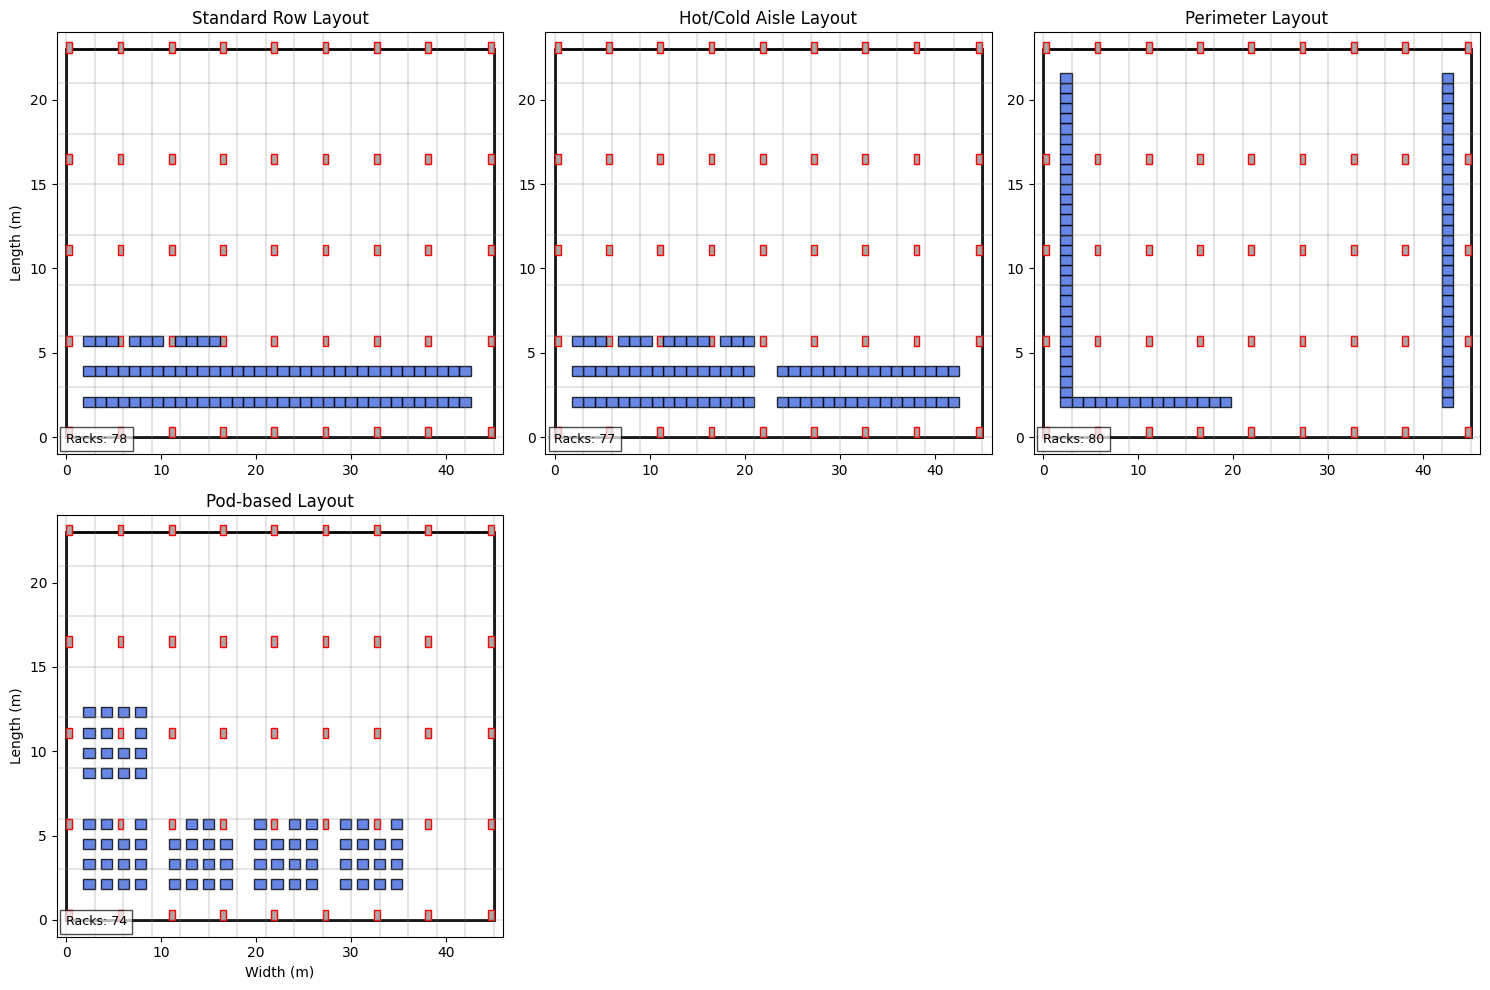


===== Advanced Layout Strategies =====
Created data center grid: 45.0m × 23.0m
Using standard 600mm × 600mm grid: 75 × 39 cells
Generating Spine-Leaf Network Layout...
Successfully placed 76 racks


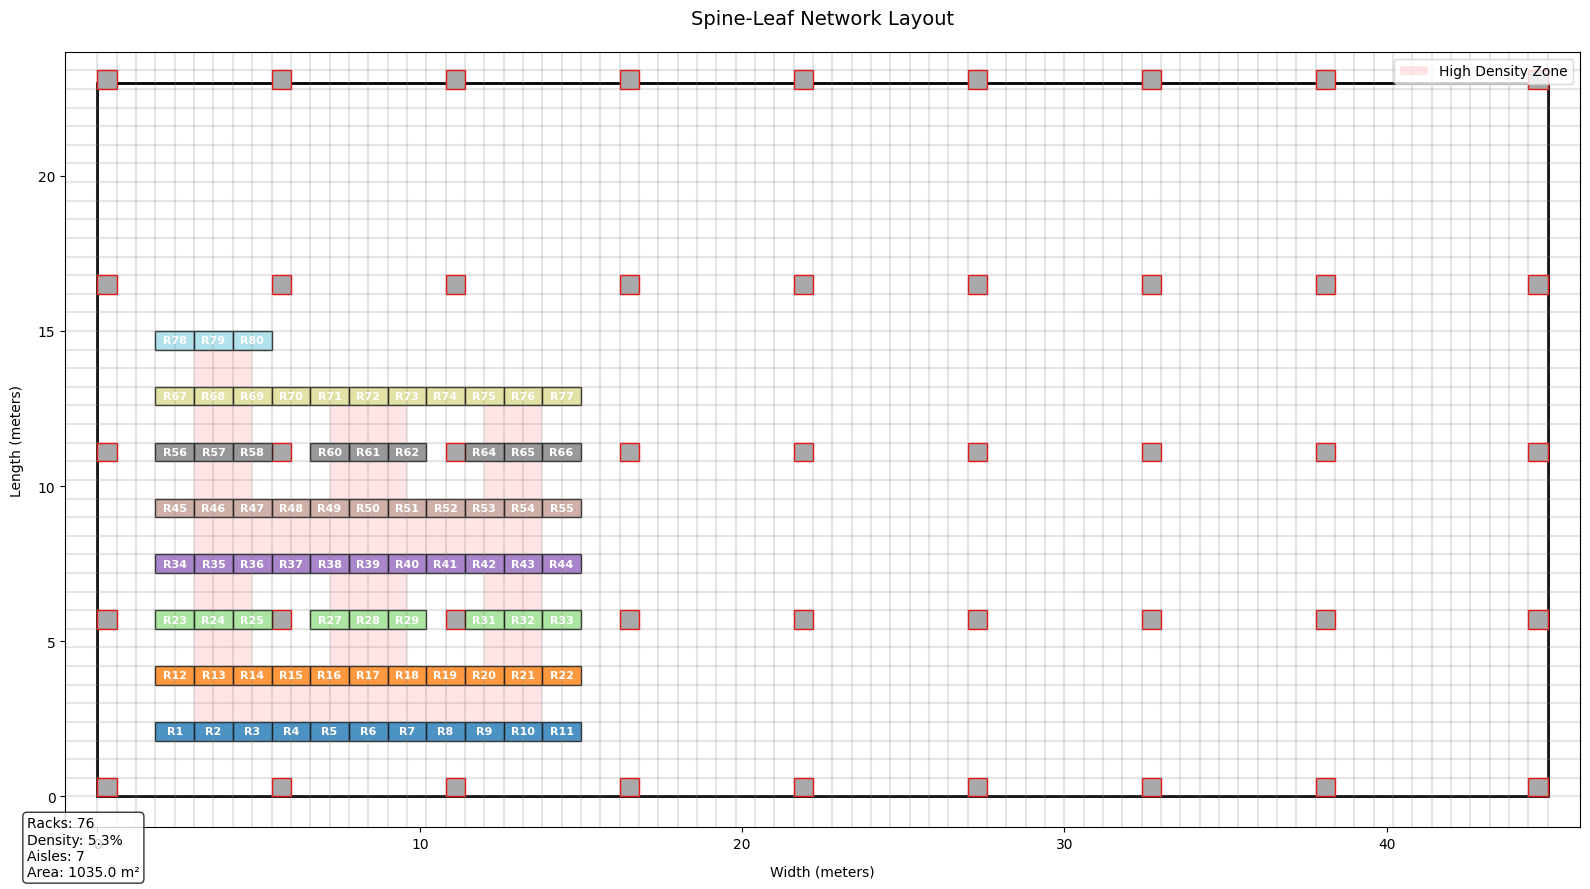

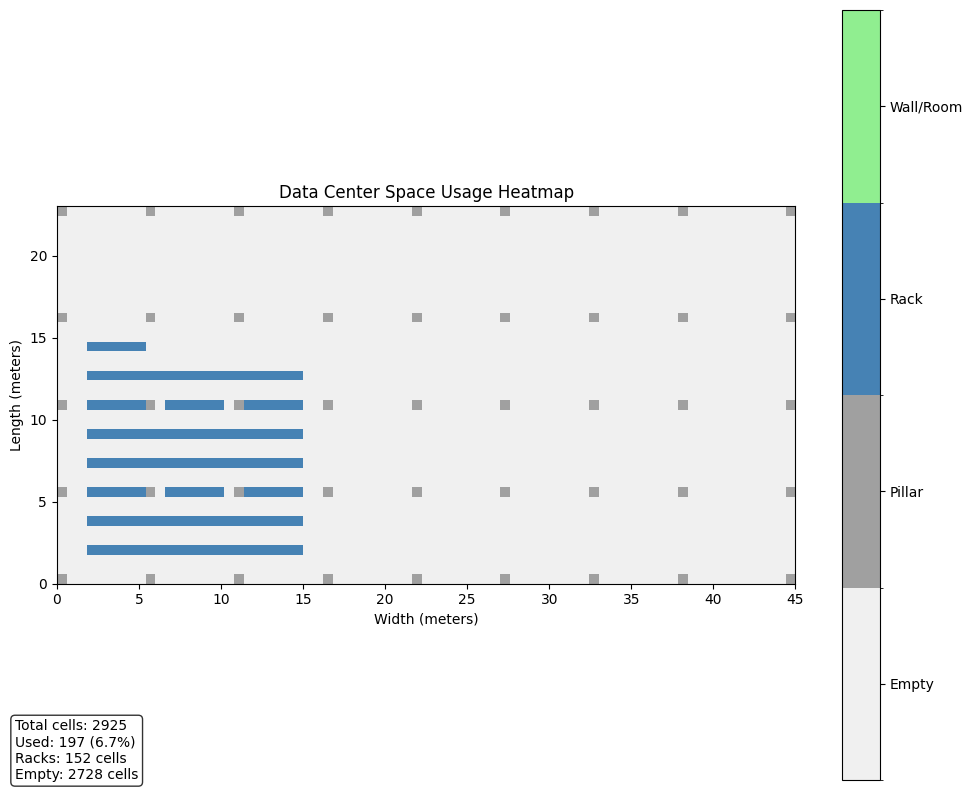


===== Finding Optimal Layout =====

Layout Comparison (Sorted by Space Utilization):
--------------------------------------------------
1. Perimeter Layout:
   Racks placed: 80/80
   Space utilization: 5.47%
   Rack density: 0.08 racks/m²

2. Standard Row Layout:
   Racks placed: 78/80
   Space utilization: 5.33%
   Rack density: 0.08 racks/m²

3. Hot/Cold Aisle Layout:
   Racks placed: 77/80
   Space utilization: 5.26%
   Rack density: 0.07 racks/m²

4. Spine-Leaf Network Layout:
   Racks placed: 76/80
   Space utilization: 5.20%
   Rack density: 0.07 racks/m²

5. Pod-based Layout:
   Racks placed: 74/80
   Space utilization: 5.06%
   Rack density: 0.07 racks/m²

BEST LAYOUT RECOMMENDATION:
------------------------------
Best layout: Perimeter Layout
Space utilization: 5.47%
Racks placed: 80/80
Rack density: 0.08 racks/m²

Data center layout optimization complete!


In [2]:
# Import all the modules you've already created
from datacenter_grid import DataCenterGrid
from pillar_manager import PillarManager
from rack_manager import RackManager
from visualization import visualize_datacenter, plot_grid_heatmap
from rack_layout_optimizer import RackLayoutOptimizer
from advanced_layout_strategies import AdvancedRackLayoutStrategies
from enhanced_visualization import visualize_datacenter_enhanced, compare_layouts_visually, create_usage_heatmap

# Import standard libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Create output directory if it doesn't exist
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define data center parameters
params = {
    # Room dimensions
    'width': 45.0,  # Width of the room in meters
    'length': 23.0,  # Length of the room in meters
    
    # Pillar specifications
    'pillar_width': 609.6,  # Width of pillars in mm
    'pillar_height': 609.6,  # Height of pillars in mm
    'pillar_x_spacing': 18.0,  # X-spacing between pillars in feet
    'pillar_y_spacing': 18.0,  # Y-spacing between pillars in feet
    
    # Rack specifications
    'racks': 80,  # Number of racks to add
    'top_margin': 3,  # Top margin in grid cells
    'bottom_margin': 3,  # Bottom margin in grid cells
    'left_margin': 3,  # Left margin in grid cells
    'right_margin': 3,  # Right margin in grid cells
    'row_spacing': 2,  # Spacing between rack rows in grid cells
    'aisle_width': 4,  # Width of the central aisle in grid cells
    
    # Support room specifications
    'mmr_width': 10,  # Width of MMR room in grid cells
    'mmr_height': 8,  # Height of MMR room in grid cells
    'mmr_position': 'top-right',  # Position of MMR room
}

# Create support room helper function
def create_support_room(datacenter, name, grid_x, grid_y, grid_width, grid_height):
    """Create a support room in the data center."""
    element_type = datacenter.WALL
    
    room = datacenter.place_element(grid_x, grid_y, grid_width, grid_height, element_type)
    if room:
        room['name'] = name
        if not hasattr(datacenter, 'support_rooms'):
            datacenter.support_rooms = []
        datacenter.support_rooms.append(room)
        print(f"Created support room '{name}' at ({grid_x}, {grid_y})")
    else:
        print(f"Failed to create support room '{name}' at ({grid_x}, {grid_y})")
    return room

# Clone datacenter helper function
def clone_datacenter(datacenter):
    """Create a copy of a datacenter for comparison."""
    new_dc = DataCenterGrid(datacenter.width_m, datacenter.length_m, datacenter.grid_size_m)
    
    # Copy pillars
    pillar_mgr = PillarManager(new_dc)
    for pillar in datacenter.pillars:
        grid_x = pillar.get('grid_x', 0)
        grid_y = pillar.get('grid_y', 0)
        grid_width = pillar.get('width_cells', 1)
        grid_height = pillar.get('height_cells', 1)
        pillar_mgr.place_pillar(grid_x, grid_y, grid_width, grid_height)
    
    # Copy support rooms
    if hasattr(datacenter, 'support_rooms'):
        for room in datacenter.support_rooms:
            grid_x = room.get('grid_x', 0)
            grid_y = room.get('grid_y', 0)
            grid_width = room.get('width_cells', 1)
            grid_height = room.get('height_cells', 1)
            name = room.get('name', 'Room')
            create_support_room(new_dc, name, grid_x, grid_y, grid_width, grid_height)
    
    return new_dc

# 1. Create a data center grid
print("Creating data center grid...")
datacenter = DataCenterGrid(params['width'], params['length'])

# 2. Place pillars
print("\nPlacing pillars...")
pillar_manager = PillarManager(datacenter)
pillars = pillar_manager.place_pillars_with_exact_spacing(
    params['pillar_width'], 
    params['pillar_height'], 
    params['pillar_x_spacing'], 
    params['pillar_y_spacing']
)

# 3. Add MMR room
print("\nPlacing MMR room...")
mmr_x, mmr_y = 0, 0
if params['mmr_position'] == 'top-left':
    mmr_x = 0
    mmr_y = datacenter.grid_length - params['mmr_height']
elif params['mmr_position'] == 'top-right':
    mmr_x = datacenter.grid_width - params['mmr_width']
    mmr_y = datacenter.grid_length - params['mmr_height']
elif params['mmr_position'] == 'bottom-left':
    mmr_x = 0
    mmr_y = 0
elif params['mmr_position'] == 'bottom-right':
    mmr_x = datacenter.grid_width - params['mmr_width']
    mmr_y = 0

create_support_room(datacenter, "MMR", mmr_x, mmr_y, params['mmr_width'], params['mmr_height'])

# Visualize the datacenter with pillars and MMR
fig, ax = visualize_datacenter(datacenter, "Data Center with Pillars and MMR")
plt.savefig(os.path.join(output_dir, 'datacenter_base.png'), dpi=300)
plt.show()

# 4. Compare different layout strategies
print("\n===== Comparing Layout Strategies =====")

# Create copies of the datacenter for each layout type
datacenter_copies = {}
layout_types = ["standard", "hot_cold_aisle", "perimeter", "pods"]
layout_names = {
    "standard": "Standard Row Layout",
    "hot_cold_aisle": "Hot/Cold Aisle Layout",
    "perimeter": "Perimeter Layout",
    "pods": "Pod-based Layout"
}

for layout_type in layout_types:
    datacenter_copies[layout_type] = clone_datacenter(datacenter)
    optimizer = RackLayoutOptimizer(datacenter_copies[layout_type])
    print(f"\nGenerating {layout_names[layout_type]}...")
    optimizer.generate_layout(layout_type, params['racks'])
    
    # Visualize this layout
    fig, ax = visualize_datacenter(datacenter_copies[layout_type], f"Data Center with {layout_names[layout_type]}")
    plt.savefig(os.path.join(output_dir, f'datacenter_{layout_type}.png'), dpi=300)
    plt.show()

# 5. Compare layouts side by side
fig, axes = compare_layouts_visually(
    [datacenter_copies[lt] for lt in layout_types],
    [layout_names[lt] for lt in layout_types],
    figsize=(15, 10)
)
plt.savefig(os.path.join(output_dir, 'layout_comparison.png'), dpi=300)
plt.show()

# 6. Try advanced layout strategies
print("\n===== Advanced Layout Strategies =====")

# Create a datacenter for spine-leaf layout
spine_leaf_dc = clone_datacenter(datacenter)
advanced = AdvancedRackLayoutStrategies(spine_leaf_dc)
rack_mgr = RackManager(spine_leaf_dc)

# Generate spine-leaf layout
print("Generating Spine-Leaf Network Layout...")
positions = advanced.generate_spine_leaf_layout(
    params['racks'],
    {
        "top_margin": params['top_margin'],
        "bottom_margin": params['bottom_margin'],
        "left_margin": params['left_margin'],
        "right_margin": params['right_margin'],
        "spine_width": 4
    }
)
rack_mgr.place_racks(positions)

# Visualize spine-leaf layout
fig, ax = visualize_datacenter_enhanced(
    spine_leaf_dc, 
    title="Spine-Leaf Network Layout",
    show_metrics=True,
    highlight_zones=True
)
plt.savefig(os.path.join(output_dir, 'spine_leaf_layout.png'), dpi=300)
plt.show()

# 7. Analyze space utilization
fig, ax = create_usage_heatmap(spine_leaf_dc)
plt.savefig(os.path.join(output_dir, 'usage_heatmap.png'), dpi=300)
plt.show()

# 8. Find the optimal layout based on rack density and space utilization
print("\n===== Finding Optimal Layout =====")

# Calculate metrics for all layouts
all_layouts = {}
all_layouts.update(datacenter_copies)
all_layouts["spine_leaf"] = spine_leaf_dc

all_layout_names = {}
all_layout_names.update(layout_names)
all_layout_names["spine_leaf"] = "Spine-Leaf Network Layout"

metrics = {}
for layout_type, dc in all_layouts.items():
    # Calculate space utilization
    total_space = dc.grid_width * dc.grid_length
    rack_space = sum(rack.get('width_cells', 2) * rack.get('height_cells', 1) for rack in dc.racks)
    space_utilization = rack_space / total_space
    
    # Calculate rack density
    rack_density = len(dc.racks) / (dc.width_m * dc.length_m)
    
    metrics[layout_type] = {
        "name": all_layout_names[layout_type],
        "racks_placed": len(dc.racks),
        "space_utilization": space_utilization,
        "rack_density": rack_density
    }

# Sort layouts by space utilization
sorted_layouts = sorted(metrics.keys(), key=lambda lt: metrics[lt]["space_utilization"], reverse=True)

# Print results
print("\nLayout Comparison (Sorted by Space Utilization):")
print("-" * 50)
for i, layout_type in enumerate(sorted_layouts):
    m = metrics[layout_type]
    print(f"{i+1}. {m['name']}:")
    print(f"   Racks placed: {m['racks_placed']}/{params['racks']}")
    print(f"   Space utilization: {m['space_utilization']:.2%}")
    print(f"   Rack density: {m['rack_density']:.2f} racks/m²\n")

# Get the best layout
best_layout = sorted_layouts[0]
print("BEST LAYOUT RECOMMENDATION:")
print("-" * 30)
print(f"Best layout: {metrics[best_layout]['name']}")
print(f"Space utilization: {metrics[best_layout]['space_utilization']:.2%}")
print(f"Racks placed: {metrics[best_layout]['racks_placed']}/{params['racks']}")
print(f"Rack density: {metrics[best_layout]['rack_density']:.2f} racks/m²")

print("\nData center layout optimization complete!")